Pré-processamento

**General prerequisites**
(1) 👥 Duplicates
(2) 🔮 Missing data
(3) 🐳 Outliers

**Numerical columns**
(4) 🔢 Scaling

**Balanced datasets**
(5) ⚖️ Balancing

**Categorical columns**
(6) 🔠 Encoding
(7) 🟨 Discretizing

**Generating new features**
(8) 🟨 Feature creation

**Using the most relevant features**
(9) 🤖 Feature selection, Modelling and Feature Permutation


In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [63]:
file = "../data/preparation/ML_Houses_dataset.csv"
data = pd.read_csv(file)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Duplicated

In [64]:
len(data)
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1755     True
1756     True
1757     True
1758     True
1759     True
Length: 1760, dtype: bool

In [65]:
data.duplicated().sum()

np.int64(300)

In [66]:
data = data.drop_duplicates()
len(data)

1460

Missing data

In [67]:
data.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [68]:
data.isnull().sum().sort_values(ascending=False)

WallMat          1455
PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 85, dtype: int64

In [69]:
data.isnull().sum().sort_values(ascending=False) / len(data)

WallMat          0.996575
PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 85, dtype: float64

In [70]:
# 99% is way too high
data = data.drop(columns='WallMat')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [71]:
# Alley: valores faltantes não significa falta de informação
# Os dados faltantes informam que não existem becos

data.Alley = data.Alley.replace(np.nan, "NoAlley")
data.Alley.value_counts()

Alley
NoAlley    1369
Grvl         50
Pave         41
Name: count, dtype: int64

In [72]:
# Pesos - Opção 1: retirar os dados faltantes
# data.dropna(subset=['Pesos'])
# Opção 2: substituir pela média ou outra métrica
# data.Pesos.replace(np.nan, data.Pesos.mean())

In [73]:
data.isnull().sum().sort_values(ascending=False) / len(data)

PoolQC           0.995205
MiscFeature      0.963014
Fence            0.807534
MasVnrType       0.597260
FireplaceQu      0.472603
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 84, dtype: float64

SimpleInputer

In [74]:
imputer = SimpleImputer(strategy="mean")

imputer.fit(data[['Pesos']])
data['Pesos'] = imputer.transform(data[['Pesos']])

# The mean is stored in the transformer's memory
imputer.statistics_

array([3606867.68275862])

Outliers

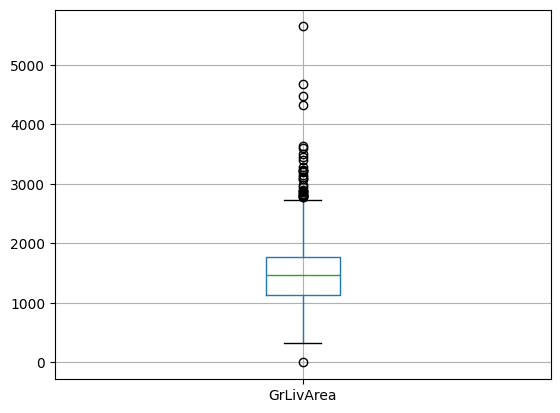

In [75]:
data[['GrLivArea']].boxplot()
plt.show()

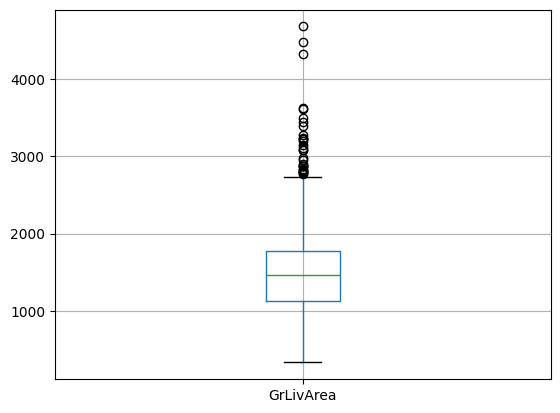

In [76]:
boolean_mask = (data['GrLivArea'] > 0) & (data['GrLivArea'] < 5000)

data = data[boolean_mask].reset_index(drop=True)

data[['GrLivArea']].boxplot()
plt.show()

Feature Scaling - Normalização

In [77]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


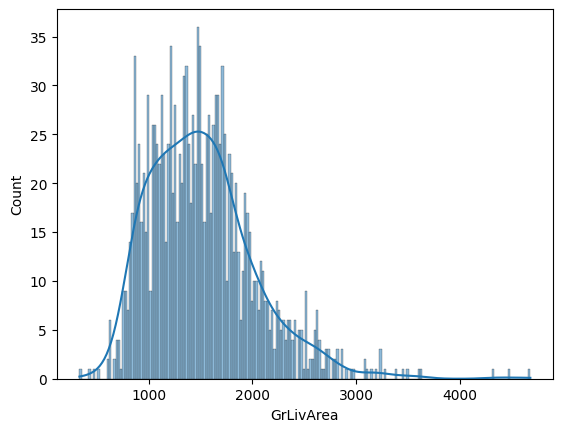

In [78]:
sns.histplot(data['GrLivArea'], bins=200, kde=True)
plt.show()

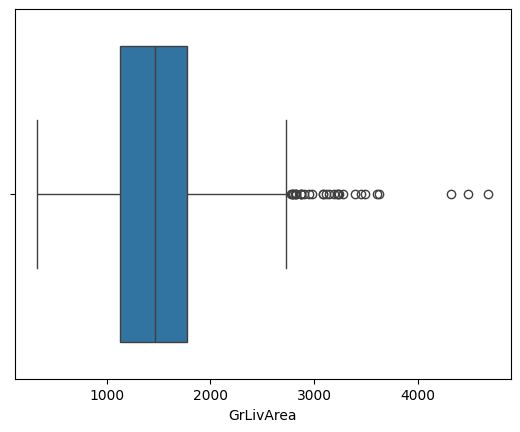

In [79]:
sns.boxplot(data=data, x='GrLivArea')
plt.show()

In [80]:
rb_scaler = RobustScaler()

rb_scaler.fit(data[['GrLivArea']])

data['GrLivArea'] = rb_scaler.transform(data[['GrLivArea']])

In [81]:
data['GrLivArea'].head()

0    0.380952
1   -0.312815
2    0.498645
3    0.391792
4    1.136663
Name: GrLivArea, dtype: float64

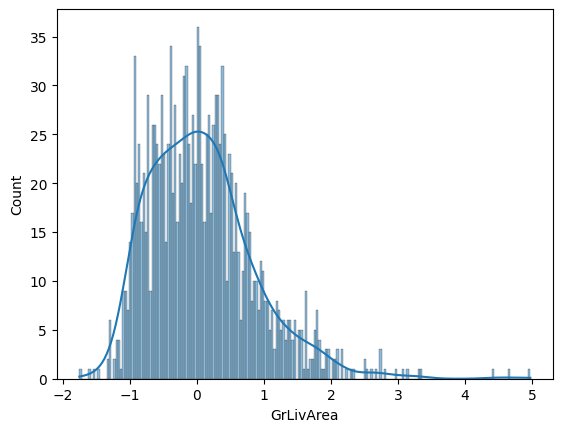

In [82]:
sns.histplot(data['GrLivArea'], bins=200, kde=True)
plt.show()

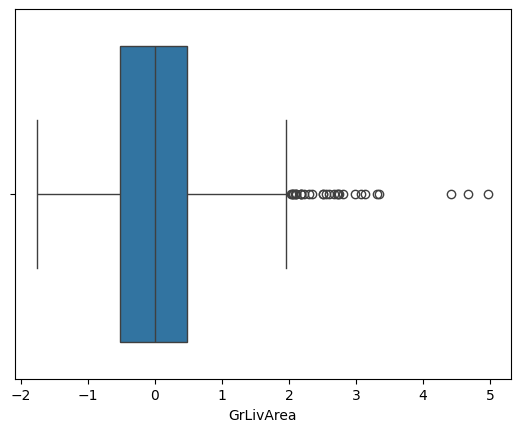

In [83]:
sns.boxplot(data=data, x='GrLivArea')
plt.show()

Encoding

In [84]:
example = pd.DataFrame({"classes": ["bad", "average", "average", "good", "good", "bad", "good"]})
example

,classes
0,bad
1,average
2,average
3,good
4,good
5,bad
6,good


In [85]:
ordinal_encoder = OrdinalEncoder()

ordinal_encoder.fit(example[["classes"]])

display(ordinal_encoder.categories_)

# Transform categories into ordered numbers
example["encoded_classes"] = ordinal_encoder.transform(example[["classes"]])

example

[array(['average', 'bad', 'good'], dtype=object)]

,classes,encoded_classes
0,bad,1.0
1,average,0.0
2,average,0.0
3,good,2.0
4,good,2.0
5,bad,1.0
6,good,2.0


In [86]:
ordinal_encoder = OrdinalEncoder(categories=[["bad", "average", "good"]])

ordinal_encoder.fit(example[["classes"]])

display(ordinal_encoder.categories_)

# Transform categories into ordered numbers
example["encoded_classes"] = ordinal_encoder.transform(example[["classes"]])

example

[array(['bad', 'average', 'good'], dtype=object)]

,classes,encoded_classes
0,bad,0.0
1,average,1.0
2,average,1.0
3,good,2.0
4,good,2.0
5,bad,0.0
6,good,2.0


In [87]:
# Check unique values for streets (3)
print(f"The unique values for 'Alley' are {data.Alley.unique()}")

ohe = OneHotEncoder(sparse_output=False) # sparse_output=True quando há muitas categorias

ohe.fit(data[["Alley"]])

print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "Alley" column
data[ohe.get_feature_names_out()] = ohe.transform(data[["Alley"]])

# Drop the column "Alley" which has been encoded
data = data.drop(columns=["Alley"])

data.head(3)

The unique values for 'Alley' are ['NoAlley' 'Grvl' 'Pave']
The categories detected by the OneHotEncoder are [array(['Grvl', 'NoAlley', 'Pave'], dtype=object)]
The column names for the encoded values are ['Alley_Grvl' 'Alley_NoAlley' 'Alley_Pave']


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alley_Grvl,Alley_NoAlley,Alley_Pave
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,NaN,0,2,2008,WD,Normal,208500,0.0,1.0,0.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,NaN,0,5,2007,WD,Normal,181500,0.0,1.0,0.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,NaN,0,9,2008,WD,Normal,223500,0.0,1.0,0.0


In [88]:
print(f"The unique values for 'Street' are {data.Street.unique()}")

ohe_binary = OneHotEncoder(sparse_output=False, drop="if_binary") # dropa uma das duas colunas

ohe_binary.fit(data[['Street']])

print(f"The categories detected by the OneHotEncoder are {ohe_binary.categories_}")

print(f"The column names for the encoded values are {ohe_binary.get_feature_names_out()}")

# Transform the current "Street" column
data[ohe_binary.get_feature_names_out()] = ohe_binary.transform(data[['Street']])

# Drop the column "Street" which has been encoded
data = data.drop(columns=["Street"])

# Show the dataset
data.head(3)

The unique values for 'Street' are ['Pave' 'Grvl']
The categories detected by the OneHotEncoder are [array(['Grvl', 'Pave'], dtype=object)]
The column names for the encoded values are ['Street_Pave']


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alley_Grvl,Alley_NoAlley,Alley_Pave,Street_Pave
0,1,60,RL,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2008,WD,Normal,208500,0.0,1.0,0.0,1.0
1,2,20,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,...,0,5,2007,WD,Normal,181500,0.0,1.0,0.0,1.0
2,3,60,RL,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,...,0,9,2008,WD,Normal,223500,0.0,1.0,0.0,1.0


LabelEncoder - penguins

In [89]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [90]:
target = penguins["species"]
target.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [91]:
label_encoder = LabelEncoder()

label_encoder.fit(target)

print(f"The Label Encoder has encoded the penguin classes into {label_encoder.classes_}")

encoded_target = label_encoder.transform(target)

The Label Encoder has encoded the penguin classes into ['Adelie' 'Chinstrap' 'Gentoo']


In [92]:
pd.DataFrame({"target": target, "encoded_target": encoded_target}).sample(10)

,target,encoded_target
13,Adelie,0
23,Adelie,0
25,Adelie,0
2,Adelie,0
113,Adelie,0
292,Gentoo,2
303,Gentoo,2
51,Adelie,0
255,Gentoo,2
91,Adelie,0


In [93]:
# You can revert back to the original target
original_target = label_encoder.inverse_transform(encoded_target)

pd.DataFrame({"encoded_target": encoded_target, "original_target": original_target, "target": target}).sample(10)

,encoded_target,original_target,target
310,2,Gentoo,Gentoo
246,2,Gentoo,Gentoo
81,0,Adelie,Adelie
340,2,Gentoo,Gentoo
240,2,Gentoo,Gentoo
304,2,Gentoo,Gentoo
184,1,Chinstrap,Chinstrap
341,2,Gentoo,Gentoo
152,1,Chinstrap,Chinstrap
86,0,Adelie,Adelie


Discretizing

In [94]:
data['SalePriceBinary'] = pd.cut(x=data['SalePrice'],
                                 bins=[data['SalePrice'].min()-1,
                                       data['SalePrice'].mean(),
                                       data['SalePrice'].max()+1
                                    ],
                                 labels=['cheap', 'expensive'])
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alley_Grvl,Alley_NoAlley,Alley_Pave,Street_Pave,SalePriceBinary
0,1,60,RL,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,...,2,2008,WD,Normal,208500,0.0,1.0,0.0,1.0,expensive
1,2,20,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,...,5,2007,WD,Normal,181500,0.0,1.0,0.0,1.0,expensive
2,3,60,RL,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,...,9,2008,WD,Normal,223500,0.0,1.0,0.0,1.0,expensive
3,4,70,RL,60.0,9550,IR1,Lvl,AllPub,Corner,Gtl,...,2,2006,WD,Abnorml,140000,0.0,1.0,0.0,1.0,cheap
4,5,60,RL,84.0,14260,IR1,Lvl,AllPub,FR2,Gtl,...,12,2008,WD,Normal,250000,0.0,1.0,0.0,1.0,expensive


Feature Selection -> Feature correlation

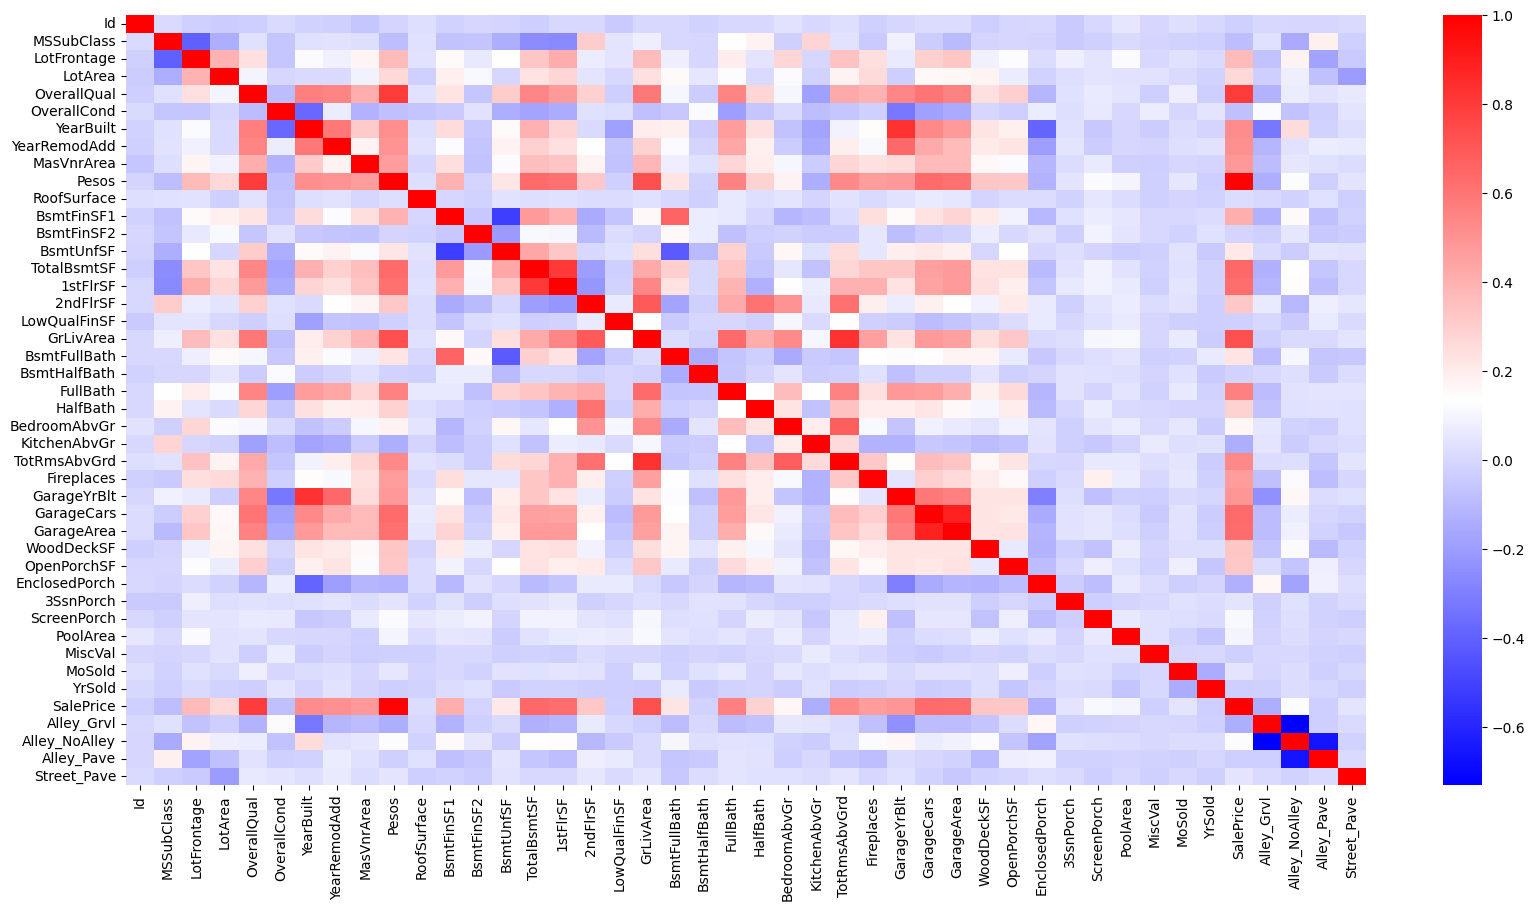

In [95]:
# Heatmap of pairwise correlations
plt.figure(figsize=(20, 10))
correlation_matrix = data.select_dtypes('number').corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names, cmap='bwr')
plt.show()

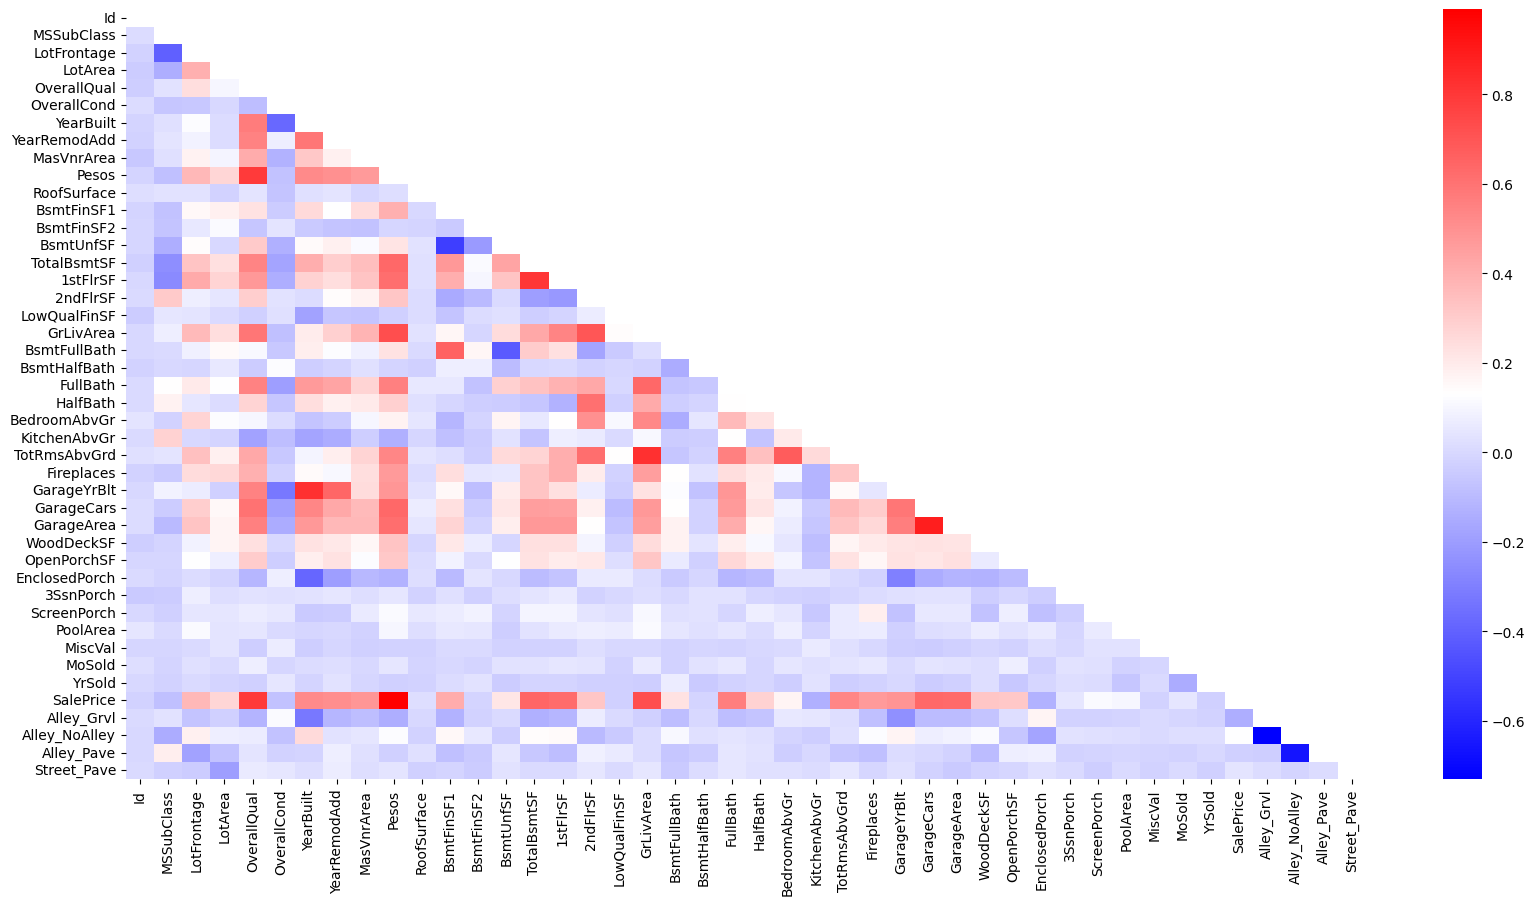

In [96]:
# Heatmap of pairwise correlations with mask
plt.figure(figsize=(20, 10))
correlation_matrix = data.select_dtypes('number').corr()
column_names = correlation_matrix.columns

# Cria máscara para esconder triângulo superior e a diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    mask=mask,
    xticklabels=column_names, 
    yticklabels=column_names, 
    cmap='bwr',
    # annot=True, # mostra valores numericos
    # fmt=".2f", # casas decimais
    cbar=True
    )
plt.show()

In [97]:
# Convert the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

In [98]:
# Let's see which pairs of features are the most correlated (both positively and negatively)

# Compute the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

# Show the top 5 most correlated pairs of feature
corr_df.sort_values(by="absolute_correlation", ascending=False).head(5*2)

,feature_1,feature_2,correlation,absolute_correlation
435,Pesos,SalePrice,0.990351,0.990351
1725,SalePrice,Pesos,0.990351,0.990351
1304,GarageArea,GarageCars,0.887607,0.887607
1261,GarageCars,GarageArea,0.887607,0.887607
817,GrLivArea,TotRmsAbvGrd,0.828094,0.828094
1118,TotRmsAbvGrd,GrLivArea,0.828094,0.828094
291,YearBuilt,GarageYrBlt,0.825491,0.825491
1194,GarageYrBlt,YearBuilt,0.825491,0.825491
674,1stFlrSF,TotalBsmtSF,0.807360,0.807360
631,TotalBsmtSF,1stFlrSF,0.807360,0.807360


In [99]:
# The feature Pesos is perfectly correlated to the target SalePrice
data = data.drop(columns=['Pesos'])